In [8]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import pickle
from utils import get_best_t
from utils import get_theory_curves
from data_load import load_minimum, collect_minima, load_data

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
font = {'family' : 'Arial',
    'weight' : 'medium',
    'size'   : 14,
    'style'  : 'normal'}
matplotlib.rc('font', **font)

In [9]:
# -------------------------------------------------------------------
# States / conditions per dataset
# -------------------------------------------------------------------

states_zhang = ["mid_G1", "late_G1"]
states_abramo = ["4h", "5h", "6h", "7h"]

states_bonev = [
    "HiC_CN_1.mm10.mapq_30.1000.mcool",
    "HiC_CN_2.mm10.mapq_30.1000.mcool",
    "HiC_CN_3.mm10.mapq_30.1000.mcool",
    "HiC_CN_4.mm10.mapq_30.1000.mcool",
    "HiC_CN_5.mm10.mapq_30.1000.mcool",
    "HiC_CN_6.mm10.mapq_30.1000.mcool",
    "HiC_ES_1.mm10.mapq_30.1000.mcool",
    "HiC_ES_2.mm10.mapq_30.1000.mcool",
    "HiC_ES_3.mm10.mapq_30.1000.mcool",
    "HiC_ES_4.mm10.mapq_30.1000.mcool",
    "HiC_ncx_CN_1.mm10.mapq_30.1000.mcool",
    "HiC_ncx_CN_2.mm10.mapq_30.1000.mcool",
    "HiC_ncx_CN_3.mm10.mapq_30.1000.mcool",
    "HiC_ncx_CN_4.mm10.mapq_30.1000.mcool",
]

states_rao = [
    "GM12878_inSitu_DpnII.hg38.mapq_30.1000.mcool",
    "HMEC_inSitu_MboI.hg38.mapq_30.1000.mcool",
    "HUVEC_inSitu_MboI.hg38.mapq_30.1000.mcool",
    "IMR90_inSitu_MboI.hg38.mapq_30.1000.mcool",
    "K562_inSitu_MboI.hg38.mapq_30.1000.mcool",
    "KBM7_inSitu_MboI.hg38.mapq_30.1000.mcool",
    "NHEK_inSitu_MboI.hg38.mapq_30.1000.mcool",
]

states_hff = [
    "U54-HFFc6-DSG-DpnII-R1-R2_hg38.mapq_30.1000.mcool",
    "hg38_deep",
]

states_esc = [
    "U54-ESC4DN-DSG-DpnII-R1-R2_hg38.mapq_30.1000.mcool",
    "U54-ESC4DN-FA-DpnII-R1-R2_hg38.mapq_30.1000.mcool",
]

states_wutz = ["control.hg38.mapq_30.1000.mcool"]
states_schwarzer = ["TAM.mm10.mapq_30.1000.mcool"]


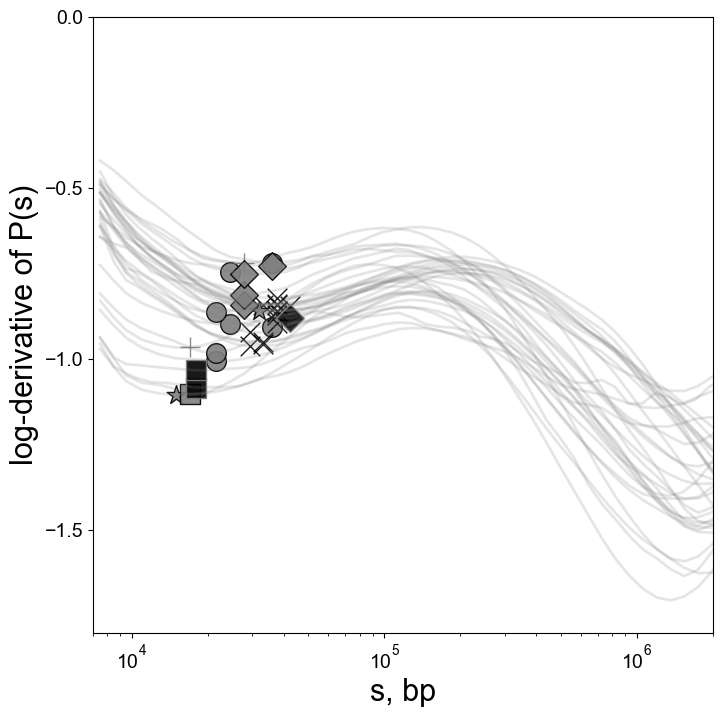

In [10]:
# Fig. 2A: collection of Hi-C curves from data/

fig = plt.figure(figsize=(8, 8)) 

data = "../data"

dataset_styles = {
    "rao":      dict(states=states_rao, marker="o", color="gray", edgecolor="k"),
    "bonev":    dict(states=states_bonev,  marker="x", color="k",   edgecolor=None),
    "oksuz_hff": dict(states=states_hff,    marker="*", color="gray", edgecolor="k"),
    "oksuz_esc": dict(states=states_esc,    marker="+", color="gray", edgecolor=None),
    "wutz":     dict(states=states_wutz,   marker="s", color="gray", edgecolor="k"),
    "schwarzer":dict(states=states_schwarzer,    marker="D", color="k",   edgecolor="gray"),
    "zhang":    dict(states=states_zhang,  marker="s", color="k",   edgecolor="gray"),
    "abramo":   dict(states=states_abramo, marker="D", color="gray",edgecolor="k"),
}

for name, style in dataset_styles.items():
    
    for state in style["states"]:
        mids, slope = load_data(f"{name}", state, data_dir)
        plt.plot(mids[1:]*1000, slope, color='gray', linewidth=2, alpha=0.2)

    xs, ys = collect_minima(f"{name}", style["states"], data_dir)
    plt.scatter(
        xs,
        ys,
        s=200,
        marker=style["marker"],
        facecolor=style["color"],
        edgecolor=style["edgecolor"],
        linewidths=1,
        alpha=0.9,
        label=name,
    )

plt.ylim([-1.8, 0])
plt.xlim([0.7*10**4, 2*10**6])
plt.yticks([-1.5, -1.0, -0.5, 0.0])

plt.xlabel('s, bp', fontsize=22)
plt.ylabel('log-derivative of P(s)', fontsize=22)
plt.xscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.show()
